

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº2
#### Angel Joseph Vargas Martinez


# Introducción
Un sistema es cualquier “caja” (real o abstracta) que recibe una señal de entrada ($x[n]$) y produce una señal de salida ($y[n]$). Para ser considerado un sistema LTI tiene que cumplir con las siguientes propiedades:
### Linealidad 
Cumple superposición:
                                                $$x[a]=y[a]$$                             $$x[b]=y[b]$$

y tambien al multiplicar por un escalar tambien modifica su salida
$$x[B.a]=y[B.a]$$
$$B.x[a]=B.y[a]$$

### Invariancia en el tiempo
Si desplazo la entrada, la salida también se desplaza igual:

$$
x[n] =y[n]
$$

$$
x[n - n_0] = y[n - n_0]
$$
## Respuesta al impulso

El secreto de los sistemas LTI es que están completamente descritos por su respuesta al impulso $h[n]$:

$$
y[n] = \sum_{k=-\infty}^{\infty} x[k] \, h[n-k]
$$

Esto se lo conoce como convolución, por lo cual si conozco cómo responde el sistema a un impulso $(h)$, puede predecir la salida a cualquier señal.
La respuesta al impulso $h[n]$ va a ser la salida del cuando la entrada es:$$
x[n] = \delta[n], \quad 
\delta[n] =
\begin{cases} 
1, & \text{si } n=0 \\ 
0, & \text{si } n≠0
\end{cases}
$$


En esta parte del código defino las librerías y las funciones que voy a utilizar, siendo sen la función de una senoidal, modu la señal modulada, cuad la señal cuadrada

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
def sen(ff, nn,vmax=1, dc=0, ph=0, fs=2):
    
    tt = np.arange(0,nn)/fs
    w0 = 2 * np.pi * ff
    xx = dc + vmax * np.sin(w0 * tt + ph)
    
    return tt, xx

def modu(fs, nn,vmax=1, dc=0, ph=0,ff=50 ):
    
    tt = np.arange(0,nn)/fs
    w0 = 2 * np.pi * ff
    xx = (dc + vmax * np.sin(w0 * tt + ph))*(dc + vmax * np.sin((w0/2) * tt +ph))
    
    return tt, xx


def cuad(fs, nn,vmax=1, dc=0, ph=0,ff=50 , duty=0.5):
    tt = np.arange(0,nn)/fs
    xx = dc + (vmax *sig.square(2 * np.pi * ff * tt + ph, duty=duty))

    
    return tt, xx

En esta parte se utilizó como $Fs= 40000$ y $N=800$, y se generaron las entradas de señales







In [3]:
# Una señal sinusoidal de 2KHz.
fs1=40000
N=800
f1=2000
t1,x1 = sen(nn=N,fs=fs1,ff=f1)
df=fs1/N
# Misma señal amplificada y desfazada en π/2.
v1=2
ph1=np.pi/2
_,x2 = sen(nn=N,fs=fs1,vmax=v1,ff=f1,ph=ph1)
# Misma señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.
t3,x3 = modu(ff=f1,ph=ph1,nn=N,fs=fs1)
# Señal anterior recortada al 75% de su amplitud
threshold= 0.75 * (1**2)/2
x4 = np.clip(x1,-threshold,threshold)
# Una señal cuadrada de 4KHz.
f2=4000
t5,x5 = cuad(nn=N,fs=fs1,ff=f2,duty=0.5)
# Un pulso rectangular de 10ms.
f3=50
t6,x6=cuad(nn=N,fs=fs1,ff=f3,duty=0.5)


La función scipy.signal.lfilter(b, a, x), está definiendo un filtro lineal en diferencias, $b$ son los coeficientes de la entrad donde $a$ son los coeficientes de la salida
La ecuación en diferencias que trabajamos es la siguiente:  
$$y[n] = 0.03\,x[n] + 0.05\,x[n-1] + 0.03\,x[n-2] + 1.5\,y[n-1] - 0.5\,y[n-2]$$



In [19]:
b=np.array([3*(10**(-2)), 5*(10**(-2)), 3*(10**(-2)) ])
a=np.array([1.0, -1.5, 0.5])

y1= sig.lfilter(b, a, x1)

Aca se grafican las señales de salida para cada una de las señales de entrada

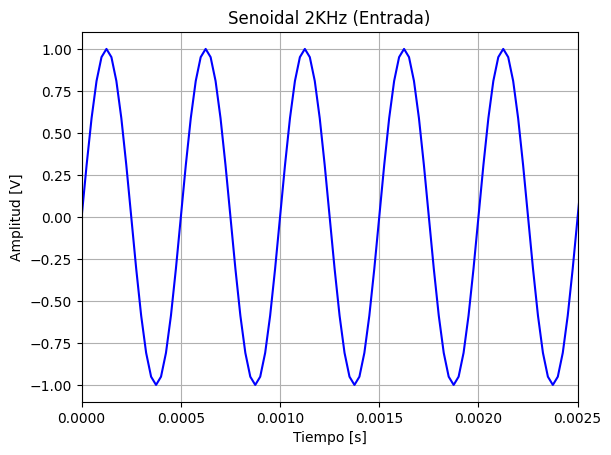

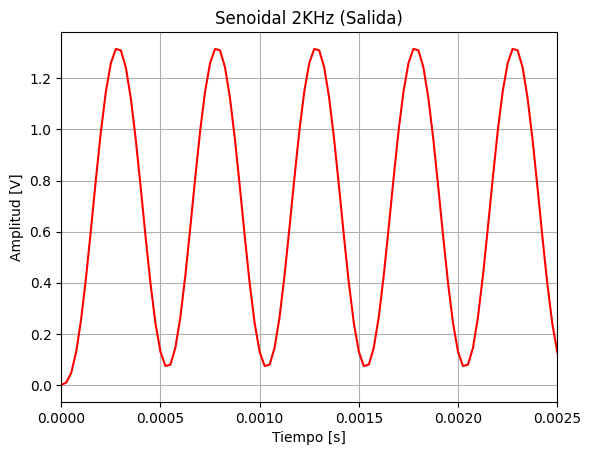

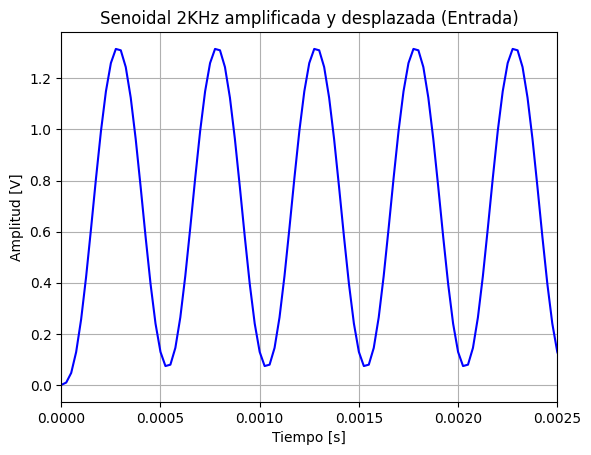

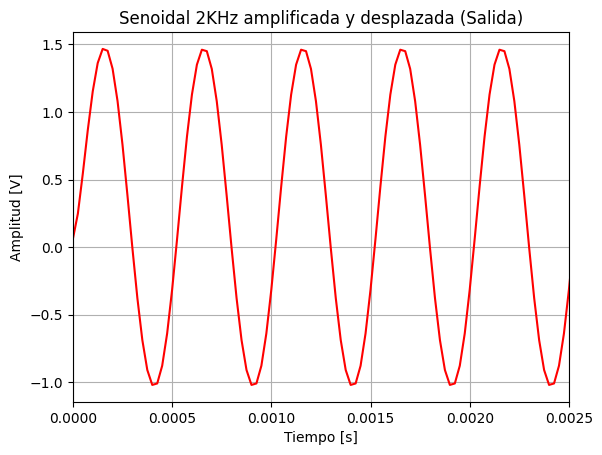

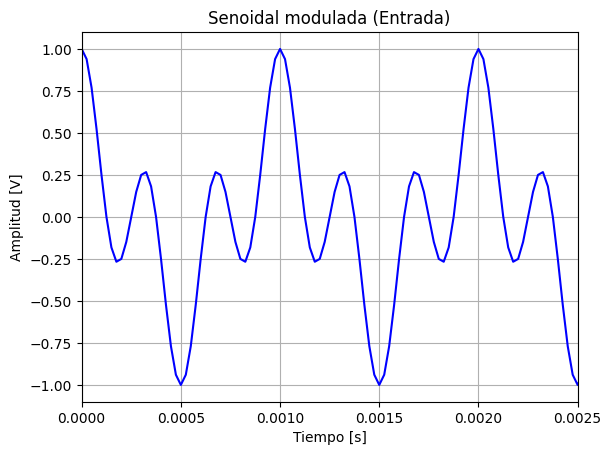

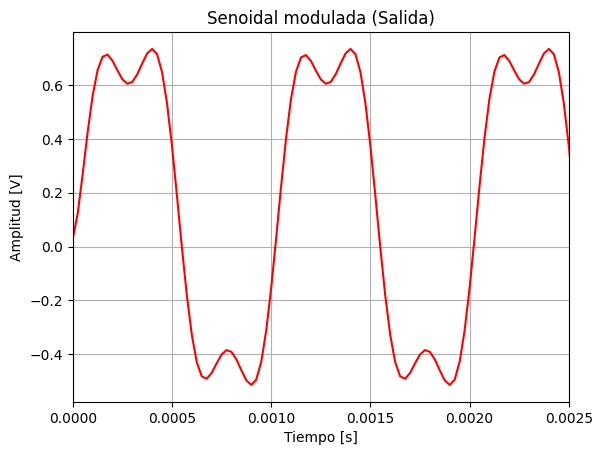

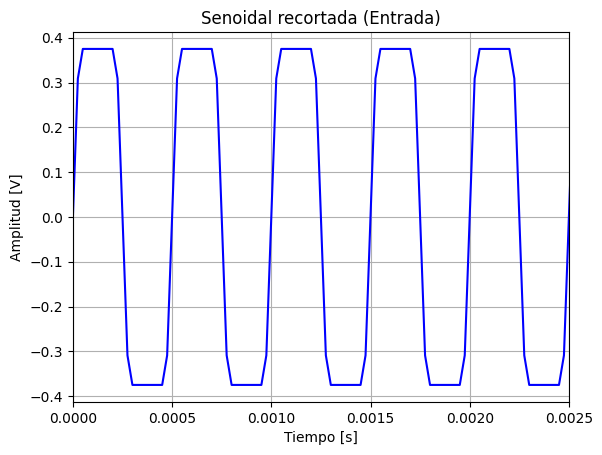

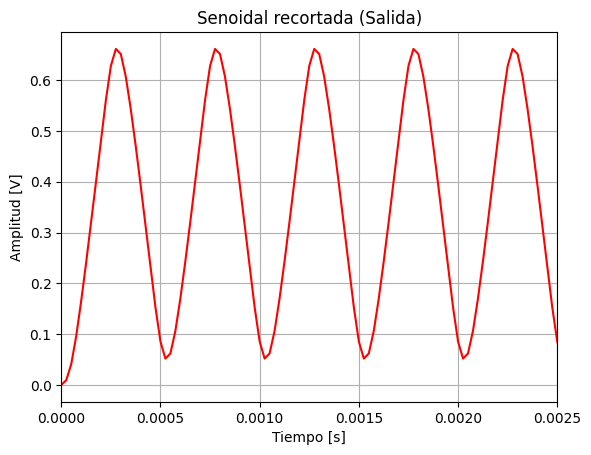

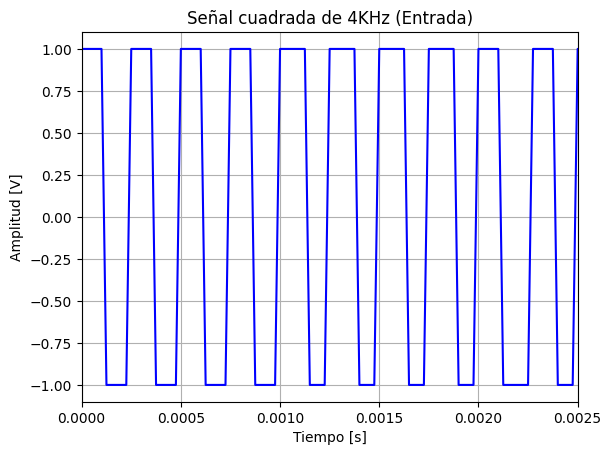

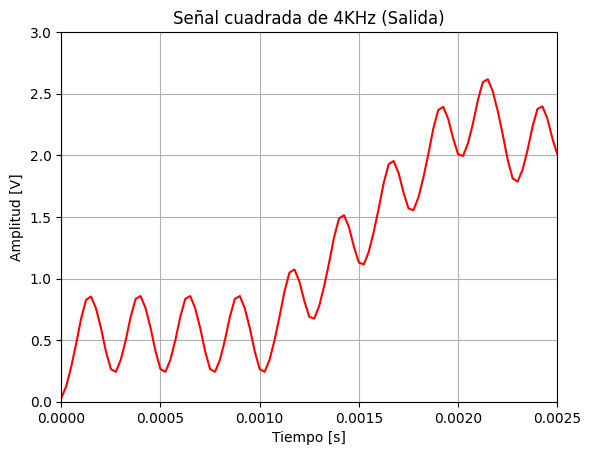

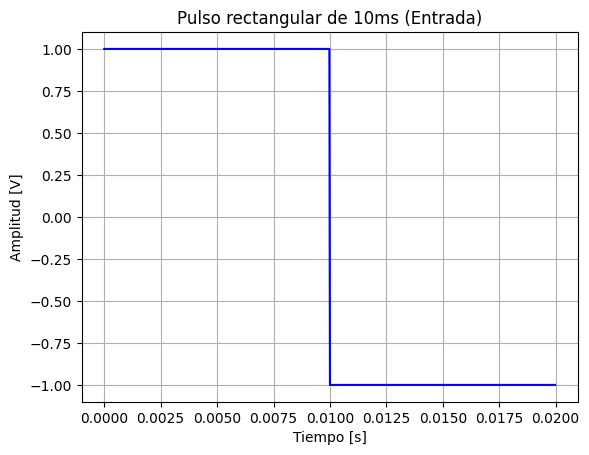

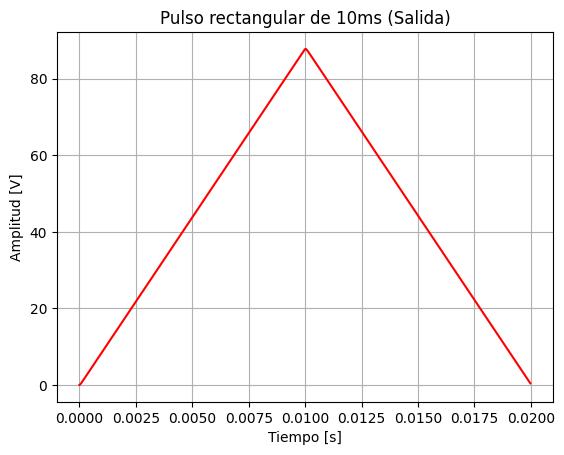

In [20]:
# Señal senoidal 2 KHz
plt.figure()
plt.plot(t1, x1, color='blue')
plt.title('Senoidal 2KHz (Entrada)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.xlim(0, 0.0025)
plt.grid(True)

plt.figure()
plt.plot(t1, y1, color='red')
plt.title('Senoidal 2KHz (Salida)')
plt.xlabel('Tiempo [s]')
plt.xlim(0, 0.0025)
plt.ylabel('Amplitud [V]')
plt.grid(True)


# Señal senoidal 2KHz amplificada y desplazada
plt.figure()
plt.plot(t1, y1, color='blue')
plt.title('Senoidal 2KHz amplificada y desplazada (Entrada)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.xlim(0, 0.0025)
plt.grid(True)

plt.figure()
plt.plot(t1, y2, color='red')
plt.title('Senoidal 2KHz amplificada y desplazada (Salida)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.xlim(0, 0.0025)
plt.grid(True)


# Señal senoidal modulada
plt.figure()
plt.plot(t3, x3, color='blue')
plt.title('Senoidal modulada (Entrada)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.xlim(0, 0.0025)
plt.grid(True)

plt.figure()
plt.plot(t3, y3, color='red')
plt.title('Senoidal modulada (Salida)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.xlim(0, 0.0025)
plt.grid(True)


# Señal senoidal recortada
plt.figure()
plt.plot(t1, x4, color='blue')
plt.title('Senoidal recortada (Entrada)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.xlim(0, 0.0025)
plt.grid(True)

plt.figure()
plt.plot(t1, y4, color='red')
plt.title('Senoidal recortada (Salida)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.xlim(0, 0.0025)
plt.grid(True)


# Señal cuadrada de 4KHz
plt.figure()
plt.plot(t5, x5, color='blue')
plt.title('Señal cuadrada de 4KHz (Entrada)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.xlim(0, 0.0025)
plt.grid(True)

plt.figure()
plt.plot(t5, y5, color='red')
plt.title('Señal cuadrada de 4KHz (Salida)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.xlim(0, 0.0025)
plt.ylim(0, 3)
plt.grid(True)


# Pulso rectangular de 10 ms
plt.figure()
plt.plot(t6, x6, color='blue')
plt.title('Pulso rectangular de 10ms (Entrada)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.grid(True)

plt.figure()
plt.plot(t6, y6, color='red')
plt.title('Pulso rectangular de 10ms (Salida)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.grid(True)


En esta parte se encuentra la respuesta al impulso, se grafica y se convoluciona con la primer señal de entrada para corroborar que den el mismo resultado

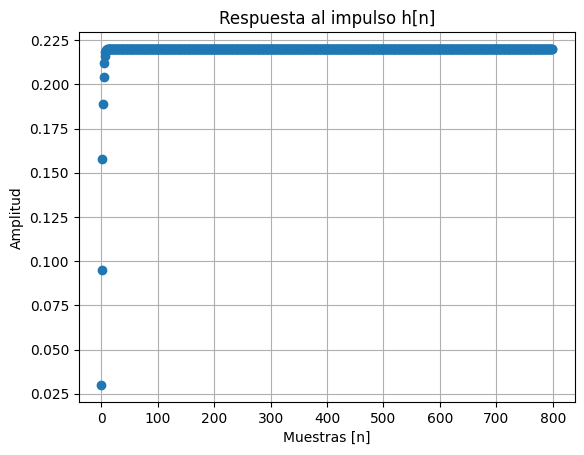

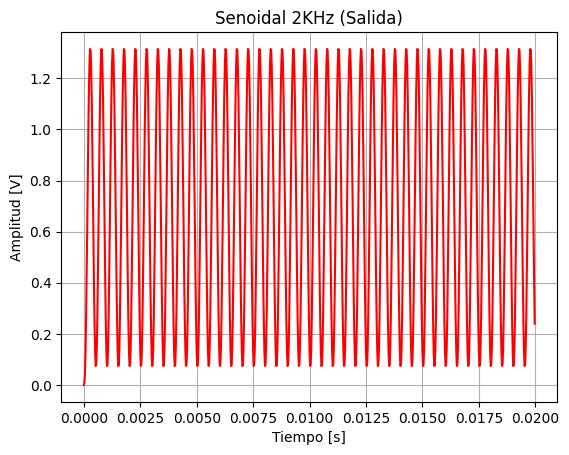

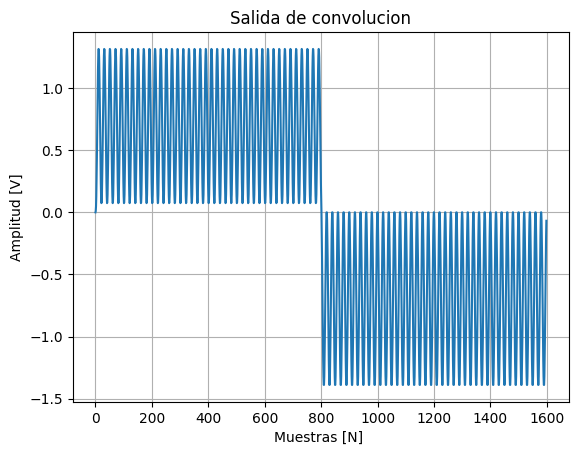

In [34]:
delta = np.zeros(N)
delta[0] = 1.0
h = sig.lfilter(b, a, delta)

plt.figure()
plt.plot(np.arange(N), h,'o')
plt.title("Respuesta al impulso h[n]")
plt.xlabel("Muestras [n]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

Yx1h = np.convolve(x1, h)
b=[3*(10**(-2)), 5*(10**(-2)), 3*(10**(-2)) ]
a=[1.0, -1.5, 0.5]

plt.figure()
plt.plot(t1, y1, color='red')
plt.title('Senoidal 2KHz (Salida)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.grid(True)

plt.figure()
plt.plot(Yx1h)
plt.title('Salida de convolucion')
plt.xlabel('Muestras [N] ')
plt.ylabel('Amplitud [V]')
plt.grid(True)
plt.show()  


Aca se definió una senoidal de 200 Hz, y se busco la respuesta al impulso y salida de los siguientes sistemas:
$$
\begin{aligned}
\text{1} \quad & y[n] = x[n] + 3 \cdot x[n-10] \\
\text{2} \quad & y[n] = x[n] + 3 \cdot y[n-10]
\end{aligned}
$$



In [30]:
f4=200

t7,x7= sen( fs=fs1, nn=N, ff= f4 )

# Sistema 1: y[n] = x[n] + 3x[n-10]
c = np.zeros(11); c[0]=1; c[10]=3
d = np.array([1.0])

Y1 = sig.lfilter(c, d, x7)

# Sistema 2: y[n] = x[n] + 3y[n-10]
e = np.array([1.0])
f = np.zeros(11); f[0]=1; f[10]=3

Y2 = sig.lfilter(e, f, x7)
 

# Respuestas al impulso
imp = np.zeros(N); imp[0] = 1
h1 = sig.lfilter(c, d, imp)
h2 = sig.lfilter(e, f, imp)



Aca se graficó la salida y respuesta de ambos sistemas


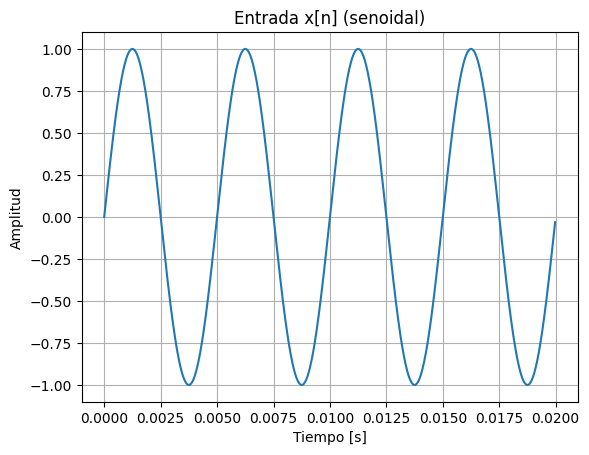

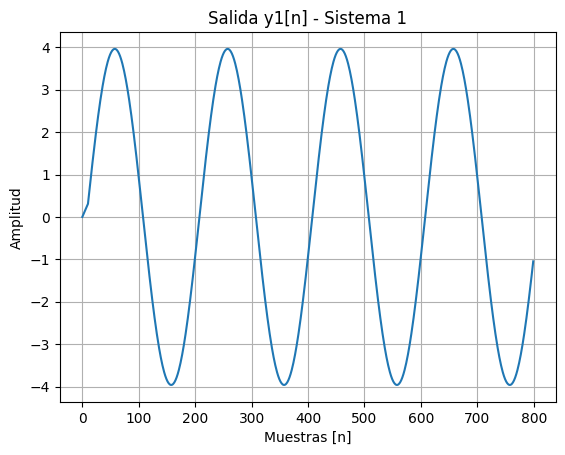

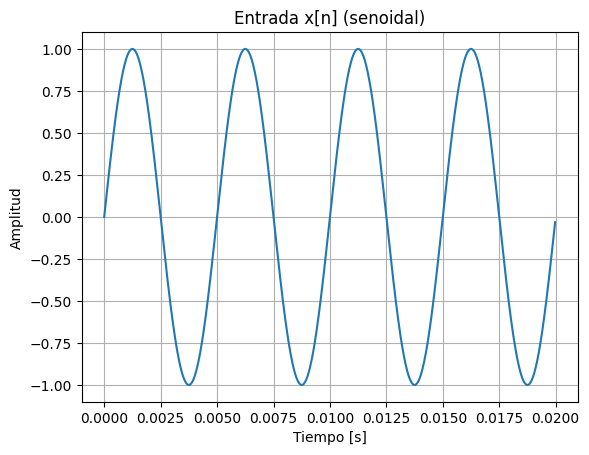

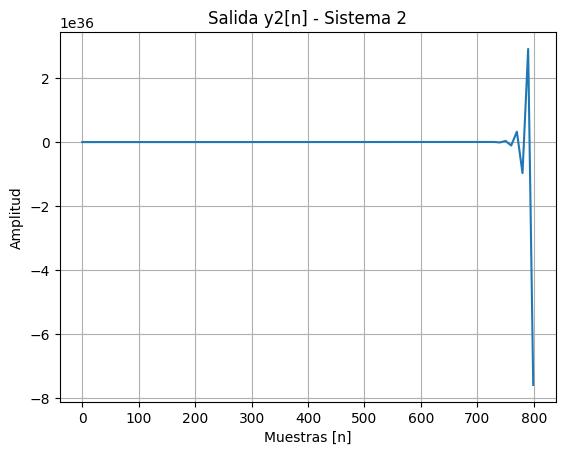

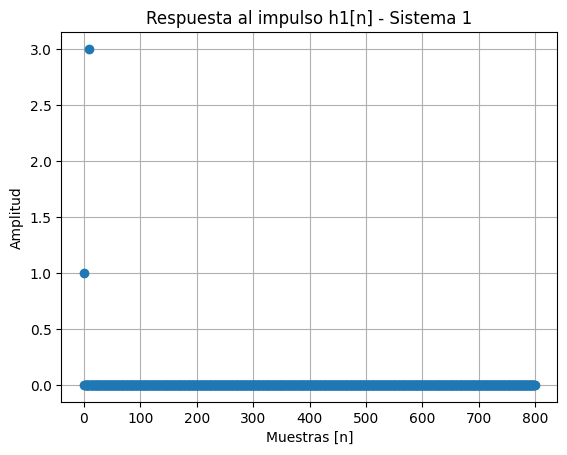

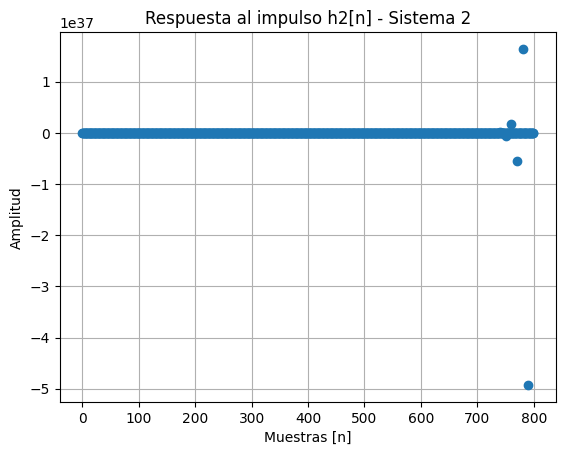

In [32]:
# Graficar entrada y salida del Sistema 1
plt.figure()
plt.plot(t7, x7)
plt.title("Entrada x[n] (senoidal)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)

plt.figure()
plt.plot(np.arange(N), Y1)
plt.title("Salida y1[n] - Sistema 1")
plt.xlabel("Muestras [n]")
plt.ylabel("Amplitud")
plt.grid(True)

# Graficar entrada y salida del Sistema 2
plt.figure()
plt.plot(t7, x7)
plt.title("Entrada x[n] (senoidal)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)

plt.figure()
plt.plot(np.arange(N), Y2)
plt.title("Salida y2[n] - Sistema 2")
plt.xlabel("Muestras [n]")
plt.ylabel("Amplitud")
plt.grid(True)

# Graficar respuestas al impulso
plt.figure()
plt.plot(np.arange(N), h1, 'o')
plt.title("Respuesta al impulso h1[n] - Sistema 1")
plt.xlabel("Muestras [n]")
plt.ylabel("Amplitud")
plt.grid(True)

plt.figure()
plt.plot(np.arange(N), h2, 'o')
plt.title("Respuesta al impulso h2[n] - Sistema 2")
plt.xlabel("Muestras [n]")
plt.ylabel("Amplitud")
plt.grid(True)

plt.show()


# Conclusiones 
En este trabajo se analizaron sistemas LTI y su comportamiento frente a distintas señales de entrada. Se verificó que estos sistemas cumplen con las propiedades de linealidad e invariancia en el tiempo, ya que la salida escala proporcionalmente al multiplicar la entrada por un escalar y se desplaza de la misma manera que la entrada si esta se retrasa o adelanta en el tiempo.

Al analizar señales sinusoidales, moduladas, recortadas, cuadradas y pulsos rectangulares, se observó cómo el sistema modifica la forma de la señal según sus características espectrales. Además, se comprobó que las salidas obtenidas mediante "lfilter" y mediante la convolución con la respuesta al impulso no coinciden, ya que al tratarse de un sistema IIR (Respuesta de impulso infinito), debido a que tiene una retroalimentación infinita implícita, y la convolución se hace con un $h[n]$ truncado, logrando que se elimine parte de la retroalimentación, y eso provoca la diferencia.




# Autoevaluación del aprendizaje
Indicar una opción:

Resolví la tarea con seguridad

**Resolví la tarea, pero tengo dudas**

Resolví la tarea,pero no entendí bien

No pude resolverla y no entendí

Responder:

¿Qué aprendiste al hacer esta tarea?

Aprendi a como sacar el impulso

¿Qué te quedó claro? ¿Qué te sigue costando?

sacar h[n], aun tengo dudas del grafico de convolucion y lfilter

**Sí, usé chatGPT, Qwen, Deepseek, Gemini, otra.** 

No usé IA.

En caso afirmativo, indicar una opción o varias:

Escritura

**Código**

**Conceptos teorícos**

**Gráficos**

**Conclusiones**.
